In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/inventory_delivery_forecast_data.csv')

In [3]:
# Convert delivery_date to datetime
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

In [4]:
# Extract temporal features for better pattern recognition
df['year'] = df['delivery_date'].dt.year
df['month'] = df['delivery_date'].dt.month
df['day_of_week'] = df['delivery_date'].dt.dayofweek
df['is_monday'] = (df['delivery_date'].dt.dayofweek == 0).astype(int)  # Monday delivery
df['is_saturday'] = (df['delivery_date'].dt.dayofweek == 5).astype(int)  # Saturday delivery
df['week_of_year'] = df['delivery_date'].dt.isocalendar().week

In [5]:
# Create seasonality features
df['season'] = df['month'].map({12: 'winter', 1: 'winter', 2: 'winter',
                                3: 'spring', 4: 'spring', 5: 'spring',
                                6: 'summer', 7: 'summer', 8: 'summer',
                                9: 'fall', 10: 'fall', 11: 'fall'})

In [6]:
# Add total inventory and ratios for better anomaly detection
df['total_inventory'] = df[['wings', 'tenders', 'fries_reg', 'fries_large', 'veggies', 'dips', 'drinks', 'flavours']].sum(axis=1)
df['wings_ratio'] = df['wings'] / df['total_inventory']
df['protein_ratio'] = (df['wings'] + df['tenders']) / df['total_inventory']
df['sides_ratio'] = (df['fries_reg'] + df['fries_large'] + df['veggies']) / df['total_inventory']
df['beverages_ratio'] = df['drinks'] / df['total_inventory']

In [7]:
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

print("\nData types:")
display(df.dtypes)

print("\nBasic statistics:")
display(df.describe())

Dataset shape: (106, 21)

First few rows:


,delivery_date,wings,tenders,fries_reg,fries_large,veggies,dips,drinks,flavours,year,...,day_of_week,is_monday,is_saturday,week_of_year,season,total_inventory,wings_ratio,protein_ratio,sides_ratio,beverages_ratio
0,2023-12-30,5714,756,136,190,179,570,246,832,2023,...,5,0,1,52,winter,8623,0.662646,0.750319,0.058564,0.028528
1,2024-01-01,5139,545,131,145,140,471,217,721,2024,...,0,1,0,1,winter,7509,0.684379,0.756958,0.055400,0.028899
2,2024-01-06,5225,577,117,160,157,475,175,718,2024,...,5,0,1,1,winter,7604,0.687138,0.763019,0.057075,0.023014
3,2024-01-08,4682,623,157,137,132,470,237,735,2024,...,0,1,0,2,winter,7173,0.652725,0.739579,0.059389,0.033041
4,2024-01-13,4571,628,144,108,106,388,184,709,2024,...,5,0,1,2,winter,6838,0.668470,0.760310,0.052354,0.026908



Data types:


delivery_date      datetime64[ns]
wings                       int64
tenders                     int64
fries_reg                   int64
fries_large                 int64
veggies                     int64
dips                        int64
drinks                      int64
flavours                    int64
year                        int32
month                       int32
day_of_week                 int32
is_monday                   int64
is_saturday                 int64
week_of_year               UInt32
season                     object
total_inventory             int64
wings_ratio               float64
protein_ratio             float64
sides_ratio               float64
beverages_ratio           float64
dtype: object


Basic statistics:


,delivery_date,wings,tenders,fries_reg,fries_large,veggies,dips,drinks,flavours,year,month,day_of_week,is_monday,is_saturday,week_of_year,total_inventory,wings_ratio,protein_ratio,sides_ratio,beverages_ratio
count,106,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.0,106.000000,106.000000,106.000000,106.000000,106.000000
mean,2024-06-30 00:00:00,4926.537736,690.830189,136.264151,152.594340,145.405660,490.773585,216.358491,759.094340,2023.990566,6.575472,2.500000,0.500000,0.500000,26.5,7517.858491,0.654695,0.746646,0.057814,0.029016
min,2023-12-30 00:00:00,1108.000000,112.000000,38.000000,37.000000,37.000000,123.000000,68.000000,182.000000,2023.000000,1.000000,0.000000,0.000000,0.000000,1.0,1720.000000,0.560006,0.705526,0.045698,0.021369
25%,2024-03-30 12:00:00,4487.000000,609.250000,125.250000,137.000000,129.000000,444.750000,194.000000,703.500000,2024.000000,4.000000,0.000000,0.000000,0.000000,13.25,6928.250000,0.641011,0.741027,0.055095,0.026477
50%,2024-06-30 00:00:00,4931.000000,676.500000,135.500000,148.500000,141.500000,475.500000,218.500000,756.500000,2024.000000,7.000000,2.500000,0.500000,0.500000,26.5,7439.500000,0.657467,0.747803,0.057493,0.028860
75%,2024-09-29 12:00:00,5408.500000,789.000000,148.000000,172.000000,164.750000,542.750000,237.750000,828.250000,2024.000000,9.750000,5.000000,1.000000,1.000000,39.75,8217.500000,0.669855,0.755723,0.060409,0.030867
max,2024-12-30 00:00:00,6898.000000,1210.000000,206.000000,233.000000,220.000000,678.000000,332.000000,1040.000000,2024.000000,12.000000,5.000000,1.000000,1.000000,52.0,10463.000000,0.718158,0.775937,0.068023,0.043969
std,NaN,885.912090,163.685265,26.955449,32.619824,31.187842,89.605621,40.671785,121.870621,0.097129,3.494071,2.511877,0.502375,0.502375,15.345699,1271.482947,0.025830,0.013067,0.004155,0.003988


In [8]:
missing_values = df.isnull().sum()
print("\nMissing values per column:")
display(missing_values)


Missing values per column:


delivery_date      0
wings              0
tenders            0
fries_reg          0
fries_large        0
veggies            0
dips               0
drinks             0
flavours           0
year               0
month              0
day_of_week        0
is_monday          0
is_saturday        0
week_of_year       0
season             0
total_inventory    0
wings_ratio        0
protein_ratio      0
sides_ratio        0
beverages_ratio    0
dtype: int64

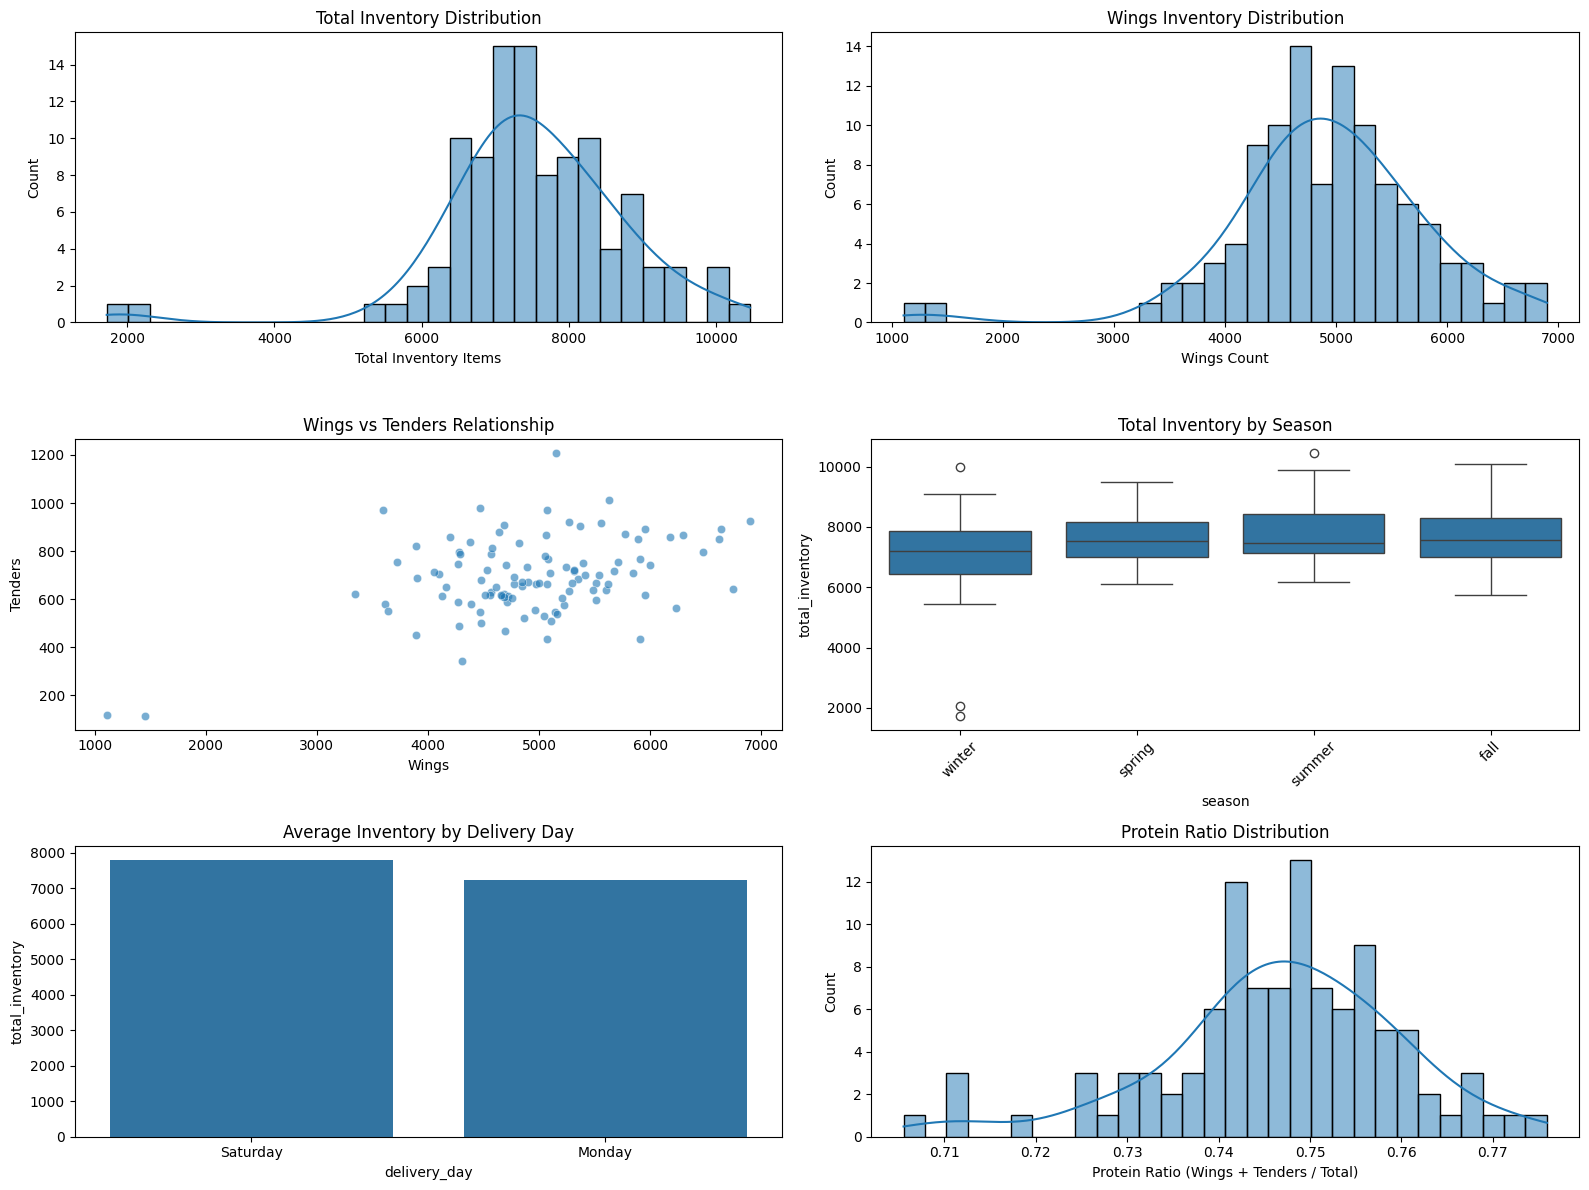

In [9]:
plt.figure(figsize=(16, 12))

# Plot 1: Total inventory distribution
plt.subplot(3, 2, 1)
sns.histplot(df['total_inventory'], kde=True, bins=30)
plt.title('Total Inventory Distribution')
plt.xlabel('Total Inventory Items')

# Plot 2: Wings distribution (main protein)
plt.subplot(3, 2, 2)
sns.histplot(df['wings'], kde=True, bins=30)
plt.title('Wings Inventory Distribution')
plt.xlabel('Wings Count')

# Plot 3: Wings vs Tenders relationship
plt.subplot(3, 2, 3)
sns.scatterplot(x='wings', y='tenders', data=df, alpha=0.6)
plt.title('Wings vs Tenders Relationship')
plt.xlabel('Wings')
plt.ylabel('Tenders')

# Plot 4: Inventory by season
plt.subplot(3, 2, 4)
sns.boxplot(x='season', y='total_inventory', data=df)
plt.title('Total Inventory by Season')
plt.xticks(rotation=45)

# Plot 5: Delivery day patterns
plt.subplot(3, 2, 5)
delivery_day_totals = df.groupby(['is_monday', 'is_saturday']).agg({
    'total_inventory': 'mean'
}).reset_index()
delivery_day_totals['delivery_day'] = delivery_day_totals.apply(
    lambda x: 'Monday' if x['is_monday'] else 'Saturday', axis=1
)
sns.barplot(x='delivery_day', y='total_inventory', data=delivery_day_totals)
plt.title('Average Inventory by Delivery Day')

# Plot 6: Protein ratio distribution
plt.subplot(3, 2, 6)
sns.histplot(df['protein_ratio'], kde=True, bins=30)
plt.title('Protein Ratio Distribution')
plt.xlabel('Protein Ratio (Wings + Tenders / Total)')

plt.tight_layout()
plt.show()

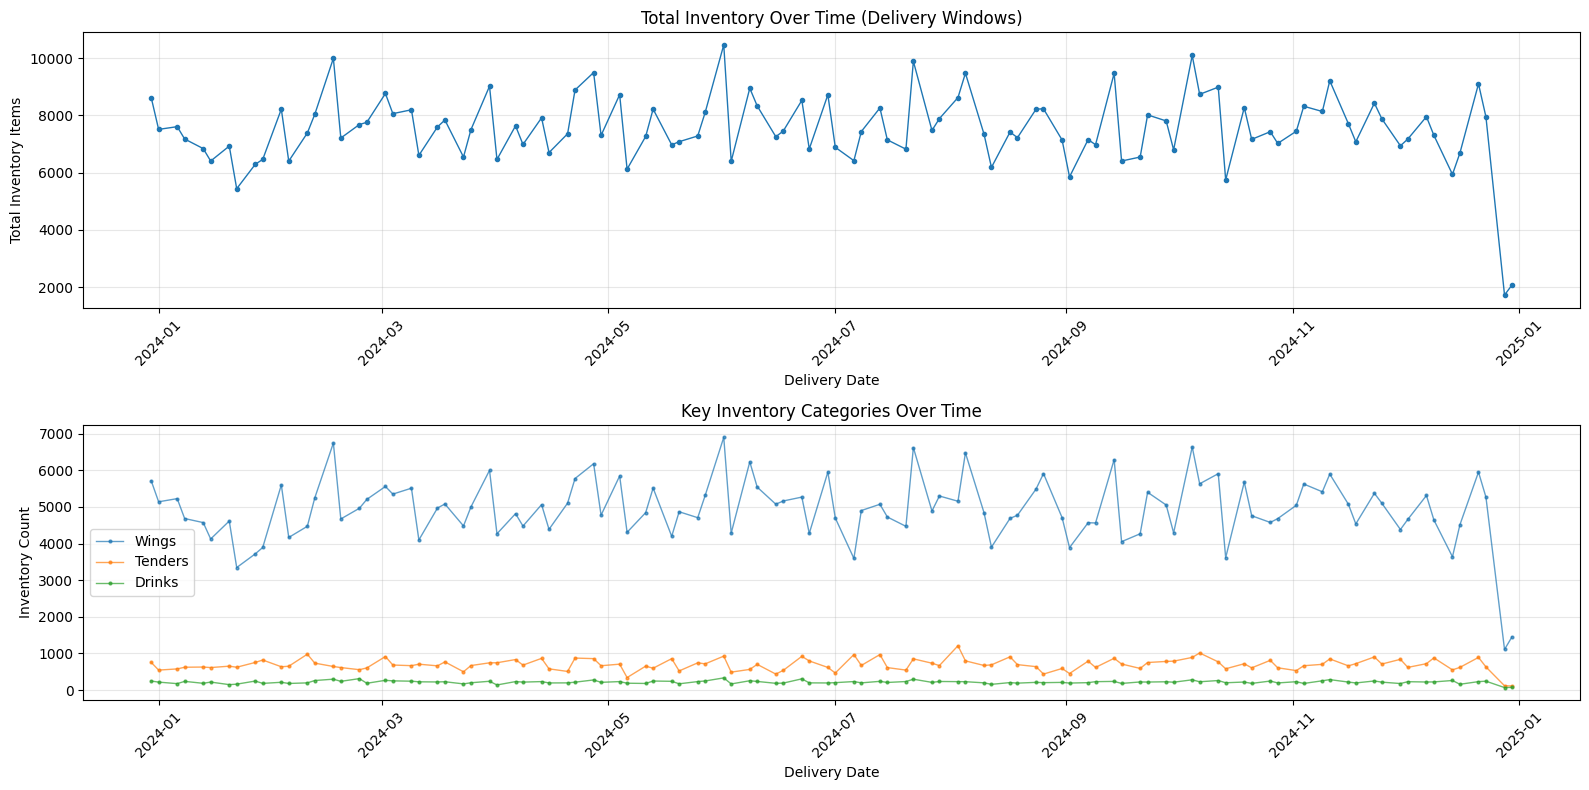

In [10]:
# Enhanced time series visualization for inventory patterns
plt.figure(figsize=(16, 8))

# Sort by delivery date for proper time series
df_time = df.sort_values('delivery_date')

# Plot 1: Total inventory over time
plt.subplot(2, 1, 1)
plt.plot(df_time['delivery_date'], df_time['total_inventory'], marker='o', linewidth=1, markersize=3)
plt.title('Total Inventory Over Time (Delivery Windows)')
plt.xlabel('Delivery Date')
plt.ylabel('Total Inventory Items')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 2: Individual inventory categories over time
plt.subplot(2, 1, 2)
for item in ['wings', 'tenders', 'drinks']:  # Show main categories
    plt.plot(df_time['delivery_date'], df_time[item], marker='o',
             linewidth=1, markersize=2, label=item.capitalize(), alpha=0.7)

plt.title('Key Inventory Categories Over Time')
plt.xlabel('Delivery Date')
plt.ylabel('Inventory Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import optuna
from optuna.samplers import TPESampler

/Users/callumarul/Library/Mobile Documents/com~apple~CloudDocs/Documents/George Brown Courses/FullStack/Project/food_demand_prediction/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
inventory_features = ['wings', 'tenders', 'fries_reg', 'fries_large', 'veggies', 'dips', 'drinks', 'flavours']
ratio_features = ['wings_ratio', 'protein_ratio', 'sides_ratio', 'beverages_ratio']
temporal_features = ['month', 'day_of_week', 'week_of_year', 'is_monday', 'is_saturday']

feature_columns = inventory_features + ratio_features + temporal_features + ['total_inventory']

print(f"Selected features: {feature_columns}")
print(f"Total number of features: {len(feature_columns)}")

Selected features: ['wings', 'tenders', 'fries_reg', 'fries_large', 'veggies', 'dips', 'drinks', 'flavours', 'wings_ratio', 'protein_ratio', 'sides_ratio', 'beverages_ratio', 'month', 'day_of_week', 'week_of_year', 'is_monday', 'is_saturday', 'total_inventory']
Total number of features: 18


In [13]:
df_sorted = df.sort_values('delivery_date')

# Create lag features for key inventory items
for item in ['wings', 'tenders', 'total_inventory']:
    df_sorted[f'{item}_lag1'] = df_sorted[item].shift(1)
    df_sorted[f'{item}_lag2'] = df_sorted[item].shift(2)

# Create rolling statistics for trend detection
df_sorted['total_inventory_rolling_mean'] = df_sorted['total_inventory'].shift(1).rolling(window=4).mean()
df_sorted['wings_rolling_std'] = df_sorted['wings'].shift(1).rolling(window=4).std()

# Add these to feature columns if they exist (after calculating)
lag_features = [col for col in df_sorted.columns if '_lag' in col or '_rolling_' in col]

# Update the dataframe
df = df_sorted.dropna()  # Remove rows with NaN from lag calculations

print(f"Added lag and rolling features: {lag_features}")
print(f"Dataset shape after feature engineering: {df.shape}")

Added lag and rolling features: ['wings_lag1', 'wings_lag2', 'tenders_lag1', 'tenders_lag2', 'total_inventory_lag1', 'total_inventory_lag2', 'total_inventory_rolling_mean', 'wings_rolling_std']
Dataset shape after feature engineering: (102, 29)


In [14]:
final_features = feature_columns + lag_features

final_features = [col for col in final_features if col in df.columns]

print(f"Final feature set: {final_features}")
print(f"Number of features: {len(final_features)}")

X = df[final_features].values
print(f"Feature matrix shape: {X.shape}")

Final feature set: ['wings', 'tenders', 'fries_reg', 'fries_large', 'veggies', 'dips', 'drinks', 'flavours', 'wings_ratio', 'protein_ratio', 'sides_ratio', 'beverages_ratio', 'month', 'day_of_week', 'week_of_year', 'is_monday', 'is_saturday', 'total_inventory', 'wings_lag1', 'wings_lag2', 'tenders_lag1', 'tenders_lag2', 'total_inventory_lag1', 'total_inventory_lag2', 'total_inventory_rolling_mean', 'wings_rolling_std']
Number of features: 26
Feature matrix shape: (102, 26)


In [15]:
from sklearn.preprocessing import RobustScaler
import numpy as np

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

print(f"Scaled feature matrix shape: {X_scaled.shape}")
print(f"Feature scaling completed with RobustScaler")
print(f"Scaled data range: [{X_scaled.min():.3f}, {X_scaled.max():.3f}]")

Scaled feature matrix shape: (102, 26)
Feature scaling completed with RobustScaler
Scaled data range: [-4.560, 3.440]


In [16]:
X_train, X_val = train_test_split(X_scaled, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Training set shape: (81, 26)
Validation set shape: (21, 26)


In [17]:
def create_improved_autoencoder(trial):
    n_layers = trial.suggest_int('n_layers', 2, 4)
    encoder_units = trial.suggest_int('encoder_units', 32, 128, step=16)
    latent_dim = trial.suggest_int('latent_dim', 8, 24)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.4)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    activation = trial.suggest_categorical('activation', ['relu', 'elu', 'swish'])
    l2_reg = trial.suggest_float('l2_regularization', 1e-6, 1e-3, log=True)

    # Input layer
    input_dim = X_train.shape[1]
    inputs = Input(shape=(input_dim,))

    # Enhanced encoder with regularization
    x = inputs
    for i in range(n_layers):
        units = encoder_units // (2**i)
        x = Dense(units, activation=activation, kernel_regularizer=l2(l2_reg))(x)
        x = Dropout(dropout_rate)(x)

    # Bottleneck layer with constraint
    encoded = Dense(latent_dim, activation=activation, kernel_regularizer=l2(l2_reg), name='bottleneck')(x)

    # Enhanced decoder with skip connections
    x = encoded
    decoder_layers = []

    # Build decoder layers
    for i in range(n_layers):
        units = encoder_units // (2**(n_layers-i-1))
        x = Dense(units, activation=activation, kernel_regularizer=l2(l2_reg))(x)
        x = Dropout(dropout_rate)(x)
        decoder_layers.append(x)

    # Output layer with appropriate activation for scaled data
    outputs = Dense(input_dim, activation='linear')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    # optimizer
    optimizer = Adam(learning_rate=learning_rate, clipnorm=1.0)

    # Compile with Huber loss for robustness
    model.compile(
        optimizer=optimizer,
        loss='huber',
        metrics=['mae']
    )

    return model

In [18]:
def enhanced_objective(trial):
    model = create_improved_autoencoder(trial)

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        min_delta=1e-6
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=8,
        min_lr=1e-6,
        verbose=0
    )

    # Train
    history = model.fit(
        X_train, X_train,
        epochs=150,
        batch_size=trial.suggest_int('batch_size', 8, 32, step=8),
        validation_data=(X_val, X_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )

    # Return best validation loss
    return min(history.history['val_loss'])

In [19]:
study = optuna.create_study(
    direction='minimize',
    sampler=TPESampler(seed=42)
)

[I 2025-08-12 14:28:01,938] A new study created in memory with name: no-name-8a5ecda8-115b-42c4-bf16-881da7cc36b7


In [20]:
study.optimize(enhanced_objective, n_trials=75, show_progress_bar=True)

print('Enhanced optimization results:')
print(f'Best trial: {study.best_trial.number}')
print(f'Best value: {study.best_value:.8f}')
print('Best params:')
for key, value in study.best_params.items():
    print(f'    {key}: {value}')

Best trial: 0. Best value: 0.264662:   1%|▏         | 1/75 [00:01<02:02,  1.66s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:03,610] Trial 0 finished with value: 0.26466187834739685 and parameters: {'n_layers': 3, 'encoder_units': 128, 'latent_dim': 20, 'dropout_rate': 0.279597545259111, 'learning_rate': 0.0002051338263087451, 'activation': 'swish', 'l2_regularization': 6.358358856676247e-05, 'batch_size': 24}. Best is trial 0 with value: 0.26466187834739685.


Best trial: 1. Best value: 0.118514:   3%|▎         | 2/75 [00:03<02:27,  2.02s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:05,884] Trial 1 finished with value: 0.11851431429386139 and parameters: {'n_layers': 2, 'encoder_units': 128, 'latent_dim': 22, 'dropout_rate': 0.16370173320348286, 'learning_rate': 0.0002310201887845295, 'activation': 'swish', 'l2_regularization': 1.9762189340280066e-05, 'batch_size': 16}. Best is trial 1 with value: 0.11851431429386139.


Best trial: 1. Best value: 0.118514:   4%|▍         | 3/75 [00:05<02:10,  1.81s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:07,438] Trial 2 finished with value: 0.3003581464290619 and parameters: {'n_layers': 3, 'encoder_units': 32, 'latent_dim': 12, 'dropout_rate': 0.20990855298810754, 'learning_rate': 0.000816845589476017, 'activation': 'relu', 'l2_regularization': 5.987474910461405e-05, 'batch_size': 8}. Best is trial 1 with value: 0.11851431429386139.


Best trial: 1. Best value: 0.118514:   5%|▌         | 4/75 [00:06<01:47,  1.52s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:08,505] Trial 3 finished with value: 0.3207985460758209 and parameters: {'n_layers': 3, 'encoder_units': 48, 'latent_dim': 9, 'dropout_rate': 0.384665661176, 'learning_rate': 0.00853618986286683, 'activation': 'relu', 'l2_regularization': 0.00011290133559092664, 'batch_size': 16}. Best is trial 1 with value: 0.11851431429386139.


Best trial: 1. Best value: 0.118514:   7%|▋         | 5/75 [00:08<01:57,  1.68s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:10,478] Trial 4 finished with value: 0.2692885994911194 and parameters: {'n_layers': 2, 'encoder_units': 80, 'latent_dim': 8, 'dropout_rate': 0.37279612062363465, 'learning_rate': 0.00032927591344236165, 'activation': 'relu', 'l2_regularization': 4.366473592979636e-05, 'batch_size': 8}. Best is trial 1 with value: 0.11851431429386139.


Best trial: 1. Best value: 0.118514:   8%|▊         | 6/75 [00:09<01:50,  1.60s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:11,909] Trial 5 finished with value: 0.35986360907554626 and parameters: {'n_layers': 4, 'encoder_units': 112, 'latent_dim': 23, 'dropout_rate': 0.3684482051282947, 'learning_rate': 0.0015696396388661157, 'activation': 'relu', 'l2_regularization': 1.3667272915456224e-06, 'batch_size': 16}. Best is trial 1 with value: 0.11851431429386139.


Best trial: 1. Best value: 0.118514:   9%|▉         | 7/75 [00:11<01:51,  1.64s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:13,630] Trial 6 finished with value: 0.23725982010364532 and parameters: {'n_layers': 3, 'encoder_units': 48, 'latent_dim': 22, 'dropout_rate': 0.2070259980080768, 'learning_rate': 0.0003646439558980723, 'activation': 'swish', 'l2_regularization': 1.6736010167825795e-06, 'batch_size': 32}. Best is trial 1 with value: 0.11851431429386139.


Best trial: 1. Best value: 0.118514:  11%|█         | 8/75 [00:13<01:43,  1.55s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:14,994] Trial 7 finished with value: 0.28499579429626465 and parameters: {'n_layers': 4, 'encoder_units': 48, 'latent_dim': 8, 'dropout_rate': 0.3446384285364503, 'learning_rate': 0.002592475660475161, 'activation': 'elu', 'l2_regularization': 1.1895896737553539e-05, 'batch_size': 8}. Best is trial 1 with value: 0.11851431429386139.


Best trial: 1. Best value: 0.118514:  12%|█▏        | 9/75 [00:15<01:57,  1.78s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:17,284] Trial 8 finished with value: 0.25979581475257874 and parameters: {'n_layers': 4, 'encoder_units': 96, 'latent_dim': 13, 'dropout_rate': 0.1190675050858071, 'learning_rate': 0.0004187594718900631, 'activation': 'elu', 'l2_regularization': 0.0004588156549160974, 'batch_size': 16}. Best is trial 1 with value: 0.11851431429386139.


Best trial: 9. Best value: 0.0687701:  13%|█▎        | 10/75 [00:16<01:50,  1.69s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:18,782] Trial 9 finished with value: 0.06877006590366364 and parameters: {'n_layers': 2, 'encoder_units': 96, 'latent_dim': 20, 'dropout_rate': 0.2683831592708489, 'learning_rate': 0.003482846706526885, 'activation': 'elu', 'l2_regularization': 1.1919481947918734e-06, 'batch_size': 8}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  15%|█▍        | 11/75 [00:17<01:35,  1.49s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:19,805] Trial 10 finished with value: 0.10436366498470306 and parameters: {'n_layers': 2, 'encoder_units': 80, 'latent_dim': 18, 'dropout_rate': 0.2919394579380205, 'learning_rate': 0.006084700122415445, 'activation': 'elu', 'l2_regularization': 5.838891112221534e-06, 'batch_size': 32}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  16%|█▌        | 12/75 [00:18<01:25,  1.36s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:20,873] Trial 11 finished with value: 0.09741932153701782 and parameters: {'n_layers': 2, 'encoder_units': 80, 'latent_dim': 18, 'dropout_rate': 0.28523634189790636, 'learning_rate': 0.006701437805458105, 'activation': 'elu', 'l2_regularization': 4.560339782280116e-06, 'batch_size': 32}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  17%|█▋        | 13/75 [00:20<01:22,  1.33s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:22,130] Trial 12 finished with value: 0.08669167011976242 and parameters: {'n_layers': 2, 'encoder_units': 96, 'latent_dim': 16, 'dropout_rate': 0.3092159621140925, 'learning_rate': 0.0038277068071634972, 'activation': 'elu', 'l2_regularization': 4.34369823221726e-06, 'batch_size': 24}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  19%|█▊        | 14/75 [00:21<01:13,  1.21s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:23,050] Trial 13 finished with value: 0.10153302550315857 and parameters: {'n_layers': 2, 'encoder_units': 96, 'latent_dim': 15, 'dropout_rate': 0.31359334066402356, 'learning_rate': 0.0025017313451873103, 'activation': 'elu', 'l2_regularization': 1.0291702819700402e-06, 'batch_size': 24}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  20%|██        | 15/75 [00:22<01:11,  1.19s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:24,197] Trial 14 finished with value: 0.07883518934249878 and parameters: {'n_layers': 2, 'encoder_units': 96, 'latent_dim': 17, 'dropout_rate': 0.23842145184606633, 'learning_rate': 0.0028818386329330188, 'activation': 'elu', 'l2_regularization': 3.5956649622782193e-06, 'batch_size': 24}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  21%|██▏       | 16/75 [00:24<01:22,  1.40s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:26,104] Trial 15 finished with value: 0.07881521433591843 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 19, 'dropout_rate': 0.23175976468595424, 'learning_rate': 0.000974741760481069, 'activation': 'elu', 'l2_regularization': 3.798895757932492e-06, 'batch_size': 24}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  23%|██▎       | 17/75 [00:26<01:42,  1.76s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:28,706] Trial 16 finished with value: 0.1703367829322815 and parameters: {'n_layers': 3, 'encoder_units': 112, 'latent_dim': 20, 'dropout_rate': 0.24313353705747878, 'learning_rate': 0.0001074040761915771, 'activation': 'elu', 'l2_regularization': 1.2739434948695942e-05, 'batch_size': 8}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  24%|██▍       | 18/75 [00:28<01:32,  1.62s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:29,974] Trial 17 finished with value: 0.07178141921758652 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 20, 'dropout_rate': 0.17281349148909803, 'learning_rate': 0.0009417167795647025, 'activation': 'elu', 'l2_regularization': 1.965468768750776e-06, 'batch_size': 16}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  25%|██▌       | 19/75 [00:30<01:48,  1.93s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:32,635] Trial 18 finished with value: 0.19418534636497498 and parameters: {'n_layers': 3, 'encoder_units': 64, 'latent_dim': 24, 'dropout_rate': 0.16333995611426963, 'learning_rate': 0.0006592254222827096, 'activation': 'elu', 'l2_regularization': 0.0008354664638366389, 'batch_size': 8}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  27%|██▋       | 20/75 [00:31<01:30,  1.65s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:33,624] Trial 19 finished with value: 0.10147276520729065 and parameters: {'n_layers': 2, 'encoder_units': 128, 'latent_dim': 21, 'dropout_rate': 0.10141722369702527, 'learning_rate': 0.0015731331710369509, 'activation': 'swish', 'l2_regularization': 2.1486725664350485e-06, 'batch_size': 16}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  28%|██▊       | 21/75 [00:33<01:28,  1.64s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:35,242] Trial 20 finished with value: 0.07459471374750137 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 14, 'dropout_rate': 0.16040908627686484, 'learning_rate': 0.0015176218012577312, 'activation': 'elu', 'l2_regularization': 0.00015384360248282968, 'batch_size': 8}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  29%|██▉       | 22/75 [00:35<01:35,  1.80s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:37,403] Trial 21 finished with value: 0.07907968759536743 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 14, 'dropout_rate': 0.1542178588182081, 'learning_rate': 0.0014898465377894154, 'activation': 'elu', 'l2_regularization': 0.00018239889241998346, 'batch_size': 8}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  31%|███       | 23/75 [00:37<01:30,  1.74s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:39,026] Trial 22 finished with value: 0.09137983620166779 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 10, 'dropout_rate': 0.1895140388994932, 'learning_rate': 0.0040466470215306085, 'activation': 'elu', 'l2_regularization': 0.0002580505231317943, 'batch_size': 8}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  32%|███▏      | 24/75 [00:39<01:33,  1.83s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:41,047] Trial 23 finished with value: 0.06970202922821045 and parameters: {'n_layers': 2, 'encoder_units': 96, 'latent_dim': 17, 'dropout_rate': 0.13455516829138967, 'learning_rate': 0.0011827760404463834, 'activation': 'elu', 'l2_regularization': 8.502066639314888e-06, 'batch_size': 16}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  33%|███▎      | 25/75 [00:41<01:36,  1.94s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:43,249] Trial 24 finished with value: 0.07918103039264679 and parameters: {'n_layers': 2, 'encoder_units': 80, 'latent_dim': 17, 'dropout_rate': 0.13026145024292857, 'learning_rate': 0.0006098199082040039, 'activation': 'elu', 'l2_regularization': 8.118853011261058e-06, 'batch_size': 16}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  35%|███▍      | 26/75 [00:43<01:33,  1.90s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:45,056] Trial 25 finished with value: 0.11051160842180252 and parameters: {'n_layers': 3, 'encoder_units': 96, 'latent_dim': 20, 'dropout_rate': 0.20109530004146114, 'learning_rate': 0.001100480580314645, 'activation': 'elu', 'l2_regularization': 2.4877381071663316e-06, 'batch_size': 16}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 9. Best value: 0.0687701:  36%|███▌      | 27/75 [00:45<01:34,  1.96s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:47,169] Trial 26 finished with value: 0.1385585069656372 and parameters: {'n_layers': 2, 'encoder_units': 64, 'latent_dim': 19, 'dropout_rate': 0.26891518322736907, 'learning_rate': 0.0005690893462733791, 'activation': 'elu', 'l2_regularization': 2.670351835138855e-05, 'batch_size': 16}. Best is trial 9 with value: 0.06877006590366364.


Best trial: 27. Best value: 0.059329:  37%|███▋      | 28/75 [00:47<01:32,  1.96s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:49,134] Trial 27 finished with value: 0.05932903289794922 and parameters: {'n_layers': 2, 'encoder_units': 96, 'latent_dim': 16, 'dropout_rate': 0.1344978839431655, 'learning_rate': 0.002216508223728461, 'activation': 'elu', 'l2_regularization': 2.420335502320699e-06, 'batch_size': 16}. Best is trial 27 with value: 0.05932903289794922.


Best trial: 27. Best value: 0.059329:  39%|███▊      | 29/75 [00:48<01:22,  1.79s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:50,511] Trial 28 finished with value: 0.1758890450000763 and parameters: {'n_layers': 3, 'encoder_units': 64, 'latent_dim': 16, 'dropout_rate': 0.127322400216974, 'learning_rate': 0.003955826473451702, 'activation': 'swish', 'l2_regularization': 7.826266202533074e-06, 'batch_size': 16}. Best is trial 27 with value: 0.05932903289794922.


Best trial: 27. Best value: 0.059329:  40%|████      | 30/75 [00:49<01:13,  1.63s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:51,776] Trial 29 finished with value: 0.2553198039531708 and parameters: {'n_layers': 3, 'encoder_units': 96, 'latent_dim': 12, 'dropout_rate': 0.2585116981877932, 'learning_rate': 0.0022805402534450078, 'activation': 'relu', 'l2_regularization': 2.6496547402513366e-06, 'batch_size': 24}. Best is trial 27 with value: 0.05932903289794922.


Best trial: 27. Best value: 0.059329:  41%|████▏     | 31/75 [00:51<01:12,  1.66s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:53,488] Trial 30 finished with value: 0.076688751578331 and parameters: {'n_layers': 2, 'encoder_units': 128, 'latent_dim': 15, 'dropout_rate': 0.10107023228980117, 'learning_rate': 0.005537059902058446, 'activation': 'swish', 'l2_regularization': 1.2210100556278267e-06, 'batch_size': 8}. Best is trial 27 with value: 0.05932903289794922.


Best trial: 27. Best value: 0.059329:  43%|████▎     | 32/75 [00:53<01:13,  1.72s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:55,361] Trial 31 finished with value: 0.06120222434401512 and parameters: {'n_layers': 2, 'encoder_units': 96, 'latent_dim': 18, 'dropout_rate': 0.1415313501542977, 'learning_rate': 0.00193714720803098, 'activation': 'elu', 'l2_regularization': 2.2918799651284454e-06, 'batch_size': 16}. Best is trial 27 with value: 0.05932903289794922.


Best trial: 32. Best value: 0.0560647:  44%|████▍     | 33/75 [00:55<01:15,  1.79s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:57,306] Trial 32 finished with value: 0.05606471374630928 and parameters: {'n_layers': 2, 'encoder_units': 96, 'latent_dim': 18, 'dropout_rate': 0.13111831796362888, 'learning_rate': 0.0018987582680629212, 'activation': 'elu', 'l2_regularization': 1.4518470668763538e-05, 'batch_size': 16}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  45%|████▌     | 34/75 [00:57<01:13,  1.80s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:28:59,150] Trial 33 finished with value: 0.06822357326745987 and parameters: {'n_layers': 2, 'encoder_units': 80, 'latent_dim': 18, 'dropout_rate': 0.1438617887294194, 'learning_rate': 0.0020237459647985297, 'activation': 'elu', 'l2_regularization': 1.7073402281200553e-05, 'batch_size': 16}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  47%|████▋     | 35/75 [00:58<01:11,  1.79s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:00,893] Trial 34 finished with value: 0.06752781569957733 and parameters: {'n_layers': 2, 'encoder_units': 80, 'latent_dim': 18, 'dropout_rate': 0.14498975270349962, 'learning_rate': 0.0017496390676966461, 'activation': 'elu', 'l2_regularization': 2.2349396052178445e-05, 'batch_size': 16}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  48%|████▊     | 36/75 [01:00<01:03,  1.63s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:02,170] Trial 35 finished with value: 0.19559252262115479 and parameters: {'n_layers': 2, 'encoder_units': 64, 'latent_dim': 19, 'dropout_rate': 0.18125984269134898, 'learning_rate': 0.0018553407029024704, 'activation': 'relu', 'l2_regularization': 6.348852990094203e-05, 'batch_size': 16}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  49%|████▉     | 37/75 [01:01<01:00,  1.59s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:03,664] Trial 36 finished with value: 0.07557731866836548 and parameters: {'n_layers': 2, 'encoder_units': 80, 'latent_dim': 15, 'dropout_rate': 0.11445041658717989, 'learning_rate': 0.0012161957476508774, 'activation': 'elu', 'l2_regularization': 3.721774644454591e-05, 'batch_size': 16}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  51%|█████     | 38/75 [01:03<00:56,  1.54s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:05,083] Trial 37 finished with value: 0.228356271982193 and parameters: {'n_layers': 3, 'encoder_units': 32, 'latent_dim': 17, 'dropout_rate': 0.14613765991267633, 'learning_rate': 0.00294801271926398, 'activation': 'swish', 'l2_regularization': 2.3605857081584793e-05, 'batch_size': 16}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  52%|█████▏    | 39/75 [01:04<00:52,  1.45s/it]

[I 2025-08-12 14:29:06,310] Trial 38 finished with value: 0.1494331806898117 and parameters: {'n_layers': 2, 'encoder_units': 80, 'latent_dim': 22, 'dropout_rate': 0.18745456173161917, 'learning_rate': 0.002064616004118402, 'activation': 'relu', 'l2_regularization': 4.708474285803341e-05, 'batch_size': 24}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  53%|█████▎    | 40/75 [01:06<00:53,  1.53s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:08,029] Trial 39 finished with value: 0.21756908297538757 and parameters: {'n_layers': 4, 'encoder_units': 64, 'latent_dim': 18, 'dropout_rate': 0.2220652141172399, 'learning_rate': 0.004929752227660925, 'activation': 'elu', 'l2_regularization': 1.3835985545079484e-05, 'batch_size': 16}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  55%|█████▍    | 41/75 [01:07<00:55,  1.64s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:09,941] Trial 40 finished with value: 0.136546790599823 and parameters: {'n_layers': 3, 'encoder_units': 80, 'latent_dim': 21, 'dropout_rate': 0.11619016907441475, 'learning_rate': 0.008109656551295577, 'activation': 'elu', 'l2_regularization': 8.991948331452136e-05, 'batch_size': 16}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  56%|█████▌    | 42/75 [01:09<00:51,  1.56s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:11,314] Trial 41 finished with value: 0.07040080428123474 and parameters: {'n_layers': 2, 'encoder_units': 80, 'latent_dim': 18, 'dropout_rate': 0.14328077524544813, 'learning_rate': 0.0020410554450940926, 'activation': 'elu', 'l2_regularization': 1.601509206788441e-05, 'batch_size': 16}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  57%|█████▋    | 43/75 [01:10<00:46,  1.47s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:12,555] Trial 42 finished with value: 0.07384100556373596 and parameters: {'n_layers': 2, 'encoder_units': 96, 'latent_dim': 16, 'dropout_rate': 0.14373320892203975, 'learning_rate': 0.0017912886460768613, 'activation': 'elu', 'l2_regularization': 2.2872977553078152e-05, 'batch_size': 16}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  59%|█████▊    | 44/75 [01:12<00:47,  1.54s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:14,284] Trial 43 finished with value: 0.07762856036424637 and parameters: {'n_layers': 2, 'encoder_units': 80, 'latent_dim': 19, 'dropout_rate': 0.17499398439890926, 'learning_rate': 0.001350739984586166, 'activation': 'elu', 'l2_regularization': 3.677667466410806e-05, 'batch_size': 16}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  60%|██████    | 45/75 [01:13<00:45,  1.51s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:15,726] Trial 44 finished with value: 0.08575379848480225 and parameters: {'n_layers': 2, 'encoder_units': 96, 'latent_dim': 18, 'dropout_rate': 0.1532598154994882, 'learning_rate': 0.0007910560829938767, 'activation': 'elu', 'l2_regularization': 1.0217092848414155e-05, 'batch_size': 16}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  61%|██████▏   | 46/75 [01:15<00:41,  1.44s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:16,988] Trial 45 finished with value: 0.12983401119709015 and parameters: {'n_layers': 2, 'encoder_units': 80, 'latent_dim': 16, 'dropout_rate': 0.11722813518362049, 'learning_rate': 0.002842881043637256, 'activation': 'relu', 'l2_regularization': 5.935355294037995e-06, 'batch_size': 16}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  63%|██████▎   | 47/75 [01:16<00:40,  1.44s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:18,434] Trial 46 finished with value: 0.058207642287015915 and parameters: {'n_layers': 2, 'encoder_units': 96, 'latent_dim': 21, 'dropout_rate': 0.13412735491628883, 'learning_rate': 0.0034007436846754755, 'activation': 'elu', 'l2_regularization': 1.760097386152986e-05, 'batch_size': 24}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  64%|██████▍   | 48/75 [01:17<00:36,  1.34s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:19,529] Trial 47 finished with value: 0.06043001636862755 and parameters: {'n_layers': 2, 'encoder_units': 96, 'latent_dim': 23, 'dropout_rate': 0.20160727681263735, 'learning_rate': 0.0031245283754637305, 'activation': 'elu', 'l2_regularization': 1.5585373391649546e-06, 'batch_size': 24}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  65%|██████▌   | 49/75 [01:18<00:32,  1.26s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:20,616] Trial 48 finished with value: 0.06343023478984833 and parameters: {'n_layers': 2, 'encoder_units': 96, 'latent_dim': 24, 'dropout_rate': 0.1990580136418106, 'learning_rate': 0.003189776341151446, 'activation': 'elu', 'l2_regularization': 1.6680863499063431e-06, 'batch_size': 24}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 32. Best value: 0.0560647:  67%|██████▋   | 50/75 [01:19<00:31,  1.26s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:21,865] Trial 49 finished with value: 0.21155811846256256 and parameters: {'n_layers': 4, 'encoder_units': 96, 'latent_dim': 23, 'dropout_rate': 0.16856427791939704, 'learning_rate': 0.004626026905872117, 'activation': 'swish', 'l2_regularization': 2.836519224769832e-06, 'batch_size': 32}. Best is trial 32 with value: 0.05606471374630928.


Best trial: 50. Best value: 0.0431276:  68%|██████▊   | 51/75 [01:21<00:28,  1.21s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:22,950] Trial 50 finished with value: 0.04312761873006821 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 23, 'dropout_rate': 0.1272151414236133, 'learning_rate': 0.0024754139512344537, 'activation': 'elu', 'l2_regularization': 5.435365872835746e-06, 'batch_size': 24}. Best is trial 50 with value: 0.04312761873006821.


Best trial: 50. Best value: 0.0431276:  69%|██████▉   | 52/75 [01:22<00:31,  1.37s/it]

[I 2025-08-12 14:29:24,706] Trial 51 finished with value: 0.057142358273267746 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 23, 'dropout_rate': 0.21696034769434086, 'learning_rate': 0.002442085285538452, 'activation': 'elu', 'l2_regularization': 1.5189773689306862e-06, 'batch_size': 24}. Best is trial 50 with value: 0.04312761873006821.


Best trial: 50. Best value: 0.0431276:  71%|███████   | 53/75 [01:24<00:30,  1.38s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:26,121] Trial 52 finished with value: 0.058744680136442184 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 23, 'dropout_rate': 0.2172517854960361, 'learning_rate': 0.0032808636953233702, 'activation': 'elu', 'l2_regularization': 5.7614705257780924e-06, 'batch_size': 24}. Best is trial 50 with value: 0.04312761873006821.


Best trial: 50. Best value: 0.0431276:  72%|███████▏  | 54/75 [01:25<00:27,  1.30s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:27,236] Trial 53 finished with value: 0.06422709673643112 and parameters: {'n_layers': 2, 'encoder_units': 128, 'latent_dim': 23, 'dropout_rate': 0.21556030641470486, 'learning_rate': 0.002463276159024232, 'activation': 'elu', 'l2_regularization': 5.71547031893607e-06, 'batch_size': 24}. Best is trial 50 with value: 0.04312761873006821.


Best trial: 50. Best value: 0.0431276:  73%|███████▎  | 55/75 [01:26<00:27,  1.37s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:28,752] Trial 54 finished with value: 0.07851520925760269 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 21, 'dropout_rate': 0.3359472348940258, 'learning_rate': 0.003575088207535563, 'activation': 'elu', 'l2_regularization': 3.6235965162029122e-06, 'batch_size': 24}. Best is trial 50 with value: 0.04312761873006821.


Best trial: 50. Best value: 0.0431276:  75%|███████▍  | 56/75 [01:27<00:24,  1.28s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:29,823] Trial 55 finished with value: 0.05572005733847618 and parameters: {'n_layers': 2, 'encoder_units': 128, 'latent_dim': 24, 'dropout_rate': 0.2274775841254692, 'learning_rate': 0.002448861251002842, 'activation': 'elu', 'l2_regularization': 5.634742150806241e-06, 'batch_size': 24}. Best is trial 50 with value: 0.04312761873006821.


Best trial: 50. Best value: 0.0431276:  76%|███████▌  | 57/75 [01:28<00:21,  1.17s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:30,752] Trial 56 finished with value: 0.06313162297010422 and parameters: {'n_layers': 2, 'encoder_units': 128, 'latent_dim': 22, 'dropout_rate': 0.22943703548681063, 'learning_rate': 0.006108426713926927, 'activation': 'elu', 'l2_regularization': 5.638311780141726e-06, 'batch_size': 24}. Best is trial 50 with value: 0.04312761873006821.


Best trial: 50. Best value: 0.0431276:  77%|███████▋  | 58/75 [01:29<00:19,  1.17s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:31,920] Trial 57 finished with value: 0.06077609211206436 and parameters: {'n_layers': 2, 'encoder_units': 128, 'latent_dim': 24, 'dropout_rate': 0.2533109921344174, 'learning_rate': 0.004496920527021493, 'activation': 'elu', 'l2_regularization': 9.242846989062022e-06, 'batch_size': 32}. Best is trial 50 with value: 0.04312761873006821.


Best trial: 50. Best value: 0.0431276:  79%|███████▊  | 59/75 [01:30<00:17,  1.10s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:32,850] Trial 58 finished with value: 0.07349397242069244 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 24, 'dropout_rate': 0.21575847041051804, 'learning_rate': 0.009460776394689665, 'activation': 'elu', 'l2_regularization': 1.1059501053845887e-05, 'batch_size': 24}. Best is trial 50 with value: 0.04312761873006821.


Best trial: 50. Best value: 0.0431276:  80%|████████  | 60/75 [01:32<00:20,  1.35s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:34,769] Trial 59 finished with value: 0.1156926304101944 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 22, 'dropout_rate': 0.30286080034449414, 'learning_rate': 0.00019428487722432413, 'activation': 'elu', 'l2_regularization': 4.453505342914622e-06, 'batch_size': 24}. Best is trial 50 with value: 0.04312761873006821.


Best trial: 50. Best value: 0.0431276:  81%|████████▏ | 61/75 [01:33<00:18,  1.29s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:35,936] Trial 60 finished with value: 0.23906132578849792 and parameters: {'n_layers': 3, 'encoder_units': 128, 'latent_dim': 22, 'dropout_rate': 0.2417015321580887, 'learning_rate': 0.0025749807232565806, 'activation': 'relu', 'l2_regularization': 1.8085038113456402e-05, 'batch_size': 24}. Best is trial 50 with value: 0.04312761873006821.


Best trial: 50. Best value: 0.0431276:  83%|████████▎ | 62/75 [01:35<00:16,  1.27s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:37,159] Trial 61 finished with value: 0.04556442052125931 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 23, 'dropout_rate': 0.12438533908910267, 'learning_rate': 0.0023339822747277666, 'activation': 'elu', 'l2_regularization': 6.7714602605379165e-06, 'batch_size': 24}. Best is trial 50 with value: 0.04312761873006821.


Best trial: 50. Best value: 0.0431276:  84%|████████▍ | 63/75 [01:36<00:15,  1.28s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:38,469] Trial 62 finished with value: 0.044605839997529984 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 23, 'dropout_rate': 0.12466610852973488, 'learning_rate': 0.0035493737246183607, 'activation': 'elu', 'l2_regularization': 6.183411625773697e-06, 'batch_size': 24}. Best is trial 50 with value: 0.04312761873006821.


Best trial: 63. Best value: 0.0426004:  85%|████████▌ | 64/75 [01:37<00:14,  1.29s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:39,779] Trial 63 finished with value: 0.04260038211941719 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 21, 'dropout_rate': 0.11057056174023032, 'learning_rate': 0.002744099482596814, 'activation': 'elu', 'l2_regularization': 7.278861157891986e-06, 'batch_size': 24}. Best is trial 63 with value: 0.04260038211941719.


Best trial: 63. Best value: 0.0426004:  87%|████████▋ | 65/75 [01:38<00:12,  1.22s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:40,817] Trial 64 finished with value: 0.05088428780436516 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 23, 'dropout_rate': 0.12268772360953699, 'learning_rate': 0.002451162812662143, 'activation': 'elu', 'l2_regularization': 7.541292947450411e-06, 'batch_size': 24}. Best is trial 63 with value: 0.04260038211941719.


Best trial: 63. Best value: 0.0426004:  88%|████████▊ | 66/75 [01:39<00:10,  1.17s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:41,884] Trial 65 finished with value: 0.0461469441652298 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 24, 'dropout_rate': 0.10910599144981234, 'learning_rate': 0.0015809202145350728, 'activation': 'elu', 'l2_regularization': 7.519708244617427e-06, 'batch_size': 32}. Best is trial 63 with value: 0.04260038211941719.


Best trial: 63. Best value: 0.0426004:  89%|████████▉ | 67/75 [01:41<00:09,  1.19s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:43,135] Trial 66 finished with value: 0.04954582080245018 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 24, 'dropout_rate': 0.10947438403529569, 'learning_rate': 0.0014463392749149279, 'activation': 'elu', 'l2_regularization': 7.154763118888504e-06, 'batch_size': 32}. Best is trial 63 with value: 0.04260038211941719.


Best trial: 63. Best value: 0.0426004:  91%|█████████ | 68/75 [01:42<00:08,  1.21s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:44,383] Trial 67 finished with value: 0.04444024711847305 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 23, 'dropout_rate': 0.11182400298186163, 'learning_rate': 0.001507096275582411, 'activation': 'elu', 'l2_regularization': 7.053286754912644e-06, 'batch_size': 32}. Best is trial 63 with value: 0.04260038211941719.


Best trial: 63. Best value: 0.0426004:  92%|█████████▏| 69/75 [01:44<00:08,  1.48s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:46,502] Trial 68 finished with value: 0.08864837884902954 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 24, 'dropout_rate': 0.10909294508507114, 'learning_rate': 0.0009103398030507968, 'activation': 'swish', 'l2_regularization': 6.910725850071154e-06, 'batch_size': 32}. Best is trial 63 with value: 0.04260038211941719.


Best trial: 63. Best value: 0.0426004:  93%|█████████▎| 70/75 [01:45<00:07,  1.41s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:47,745] Trial 69 finished with value: 0.04963148385286331 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 22, 'dropout_rate': 0.10772346825625312, 'learning_rate': 0.00110203208979045, 'activation': 'elu', 'l2_regularization': 3.2242321951466675e-06, 'batch_size': 32}. Best is trial 63 with value: 0.04260038211941719.


Best trial: 63. Best value: 0.0426004:  95%|█████████▍| 71/75 [01:47<00:06,  1.54s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:49,584] Trial 70 finished with value: 0.046114448457956314 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 23, 'dropout_rate': 0.10025261627683207, 'learning_rate': 0.0013236189125830139, 'activation': 'elu', 'l2_regularization': 4.760766242750801e-06, 'batch_size': 32}. Best is trial 63 with value: 0.04260038211941719.


Best trial: 63. Best value: 0.0426004:  96%|█████████▌| 72/75 [01:48<00:04,  1.43s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:50,743] Trial 71 finished with value: 0.0474185086786747 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 23, 'dropout_rate': 0.10096736881510097, 'learning_rate': 0.0013691020631712173, 'activation': 'elu', 'l2_regularization': 4.354270863443749e-06, 'batch_size': 32}. Best is trial 63 with value: 0.04260038211941719.


Best trial: 63. Best value: 0.0426004:  97%|█████████▋| 73/75 [01:50<00:02,  1.47s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:52,307] Trial 72 finished with value: 0.05027845501899719 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 23, 'dropout_rate': 0.12380050088512552, 'learning_rate': 0.001285565993707572, 'activation': 'elu', 'l2_regularization': 4.47643622778758e-06, 'batch_size': 32}. Best is trial 63 with value: 0.04260038211941719.


Best trial: 63. Best value: 0.0426004:  99%|█████████▊| 74/75 [01:51<00:01,  1.42s/it]WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.


[I 2025-08-12 14:29:53,602] Trial 73 finished with value: 0.04483349993824959 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 21, 'dropout_rate': 0.10092440976524601, 'learning_rate': 0.001664930742763034, 'activation': 'elu', 'l2_regularization': 3.2013315145271284e-06, 'batch_size': 32}. Best is trial 63 with value: 0.04260038211941719.


Best trial: 63. Best value: 0.0426004: 100%|██████████| 75/75 [01:52<00:00,  1.50s/it]

[I 2025-08-12 14:29:54,797] Trial 74 finished with value: 0.04785464331507683 and parameters: {'n_layers': 2, 'encoder_units': 112, 'latent_dim': 21, 'dropout_rate': 0.12467647498217904, 'learning_rate': 0.001583682030051446, 'activation': 'elu', 'l2_regularization': 3.2776819847446955e-06, 'batch_size': 32}. Best is trial 63 with value: 0.04260038211941719.
Enhanced optimization results:
Best trial: 63
Best value: 0.04260038
Best params:
    n_layers: 2
    encoder_units: 112
    latent_dim: 21
    dropout_rate: 0.11057056174023032
    learning_rate: 0.002744099482596814
    activation: elu
    l2_regularization: 7.278861157891986e-06
    batch_size: 24


In [21]:
print(f"Number of completed trials: {len(study.trials)}")
print(f"Best value so far: {study.best_value}")

Number of completed trials: 75
Best value so far: 0.04260038211941719


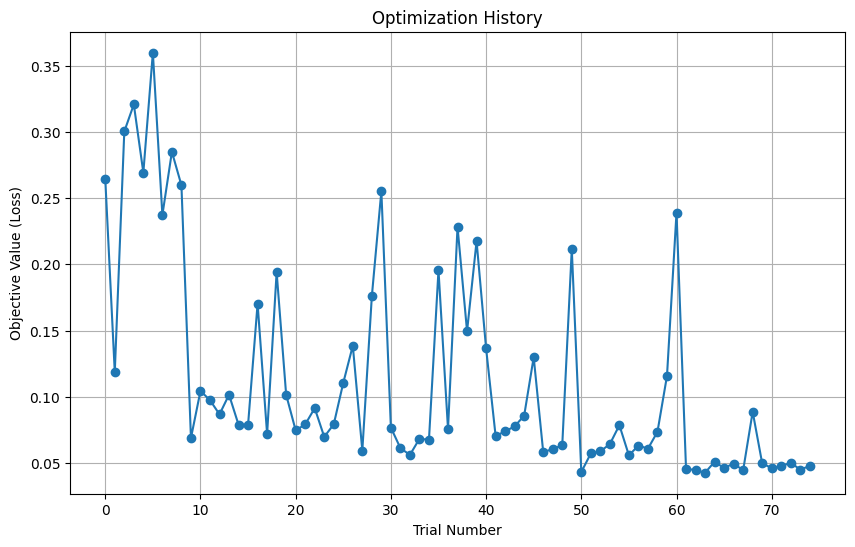

In [22]:
trial_numbers = [t.number for t in study.trials]
values = [t.value for t in study.trials if t.value is not None]

plt.figure(figsize=(10, 6))
plt.plot(trial_numbers, values, 'o-')
plt.xlabel('Trial Number')
plt.ylabel('Objective Value (Loss)')
plt.title('Optimization History')
plt.grid(True)
plt.show()

In [23]:
# Train the best model with enhanced training
best_model = create_improved_autoencoder(study.best_trial)

# Enhanced callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    min_delta=1e-7
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=10,
    min_lr=1e-7,
    verbose=1
)

# Save best model during training
checkpoint = ModelCheckpoint(
    'best_inventory_autoencoder.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train with optimal batch size from study
optimal_batch_size = study.best_params['batch_size']

print(f"Training final model with batch size: {optimal_batch_size}")

history = best_model.fit(
    X_train, X_train,
    epochs=200,
    batch_size=optimal_batch_size,
    validation_data=(X_val, X_val),
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

Training final model with batch size: 24
Epoch 1/200
1/4 [======>.......................] - ETA: 1s - loss: 0.3690 - mae: 0.7236
Epoch 1: val_loss improved from inf to 0.28275, saving model to best_inventory_autoencoder.h5
4/4 [==============================] - 0s 21ms/step - loss: 0.2784 - mae: 0.6153 - val_loss: 0.2828 - val_mae: 0.6042 - lr: 0.0027
Epoch 2/200
1/4 [======>.......................] - ETA: 0s - loss: 0.2476 - mae: 0.5621
Epoch 2: val_loss improved from 0.28275 to 0.19571, saving model to best_inventory_autoencoder.h5
4/4 [==============================] - 0s 5ms/step - loss: 0.1896 - mae: 0.4841 - val_loss: 0.1957 - val_mae: 0.4713 - lr: 0.0027
Epoch 3/200
1/4 [======>.......................] - ETA: 0s - loss: 0.1969 - mae: 0.4863
Epoch 3: val_loss improved from 0.19571 to 0.15283, saving model to best_inventory_autoencoder.h5
4/4 [==============================] - 0s 6ms/step - loss: 0.1485 - mae: 0.4201 - val_loss: 0.1528 - val_mae: 0.4075 - lr: 0.0027
Epoch 4/200
1/

/Users/callumarul/Library/Mobile Documents/com~apple~CloudDocs/Documents/George Brown Courses/FullStack/Project/food_demand_prediction/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 12: val_loss improved from 0.07315 to 0.07146, saving model to best_inventory_autoencoder.h5
4/4 [==============================] - 0s 6ms/step - loss: 0.0628 - mae: 0.2682 - val_loss: 0.0715 - val_mae: 0.2723 - lr: 0.0027
Epoch 13/200
1/4 [======>.......................] - ETA: 0s - loss: 0.0534 - mae: 0.2478
Epoch 13: val_loss improved from 0.07146 to 0.07026, saving model to best_inventory_autoencoder.h5
4/4 [==============================] - 0s 5ms/step - loss: 0.0650 - mae: 0.2732 - val_loss: 0.0703 - val_mae: 0.2669 - lr: 0.0027
Epoch 14/200
1/4 [======>.......................] - ETA: 0s - loss: 0.0713 - mae: 0.2858
Epoch 14: val_loss improved from 0.07026 to 0.06977, saving model to best_inventory_autoencoder.h5
4/4 [==============================] - 0s 5ms/step - loss: 0.0593 - mae: 0.2621 - val_loss: 0.0698 - val_mae: 0.2633 - lr: 0.0027
Epoch 15/200
1/4 [======>.......................] - ETA: 0s - loss: 0.0481 - mae: 0.2377
Epoch 15: val_loss did not improve from 0.069

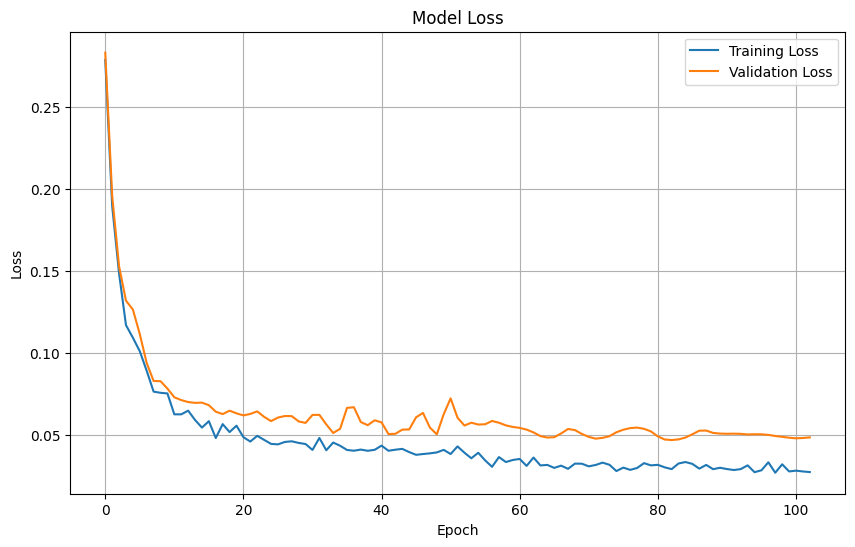

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
train_pred = best_model.predict(X_train, verbose=0)
train_reconstruction_errors = np.mean(np.square(X_train - train_pred), axis=1)

In [26]:
thresholds = {
    'conservative': np.percentile(train_reconstruction_errors, 99),    # Very few anomalies
    'balanced': np.percentile(train_reconstruction_errors, 95),       # Balanced approach
    'sensitive': np.percentile(train_reconstruction_errors, 90)       # More sensitive to anomalies
}

In [27]:
print("Anomaly detection thresholds:")
for name, threshold in thresholds.items():
    anomaly_count = np.sum(train_reconstruction_errors > threshold)
    percentage = 100 * anomaly_count / len(train_reconstruction_errors)
    print(f"{name.capitalize()}: {threshold:.6f} ({anomaly_count} anomalies, {percentage:.1f}%)")

Anomaly detection thresholds:
Conservative: 0.044471 (1 anomalies, 1.2%)
Balanced: 0.023917 (4 anomalies, 4.9%)
Sensitive: 0.021789 (8 anomalies, 9.9%)


In [28]:
# Use balanced threshold as default
threshold = thresholds['balanced']

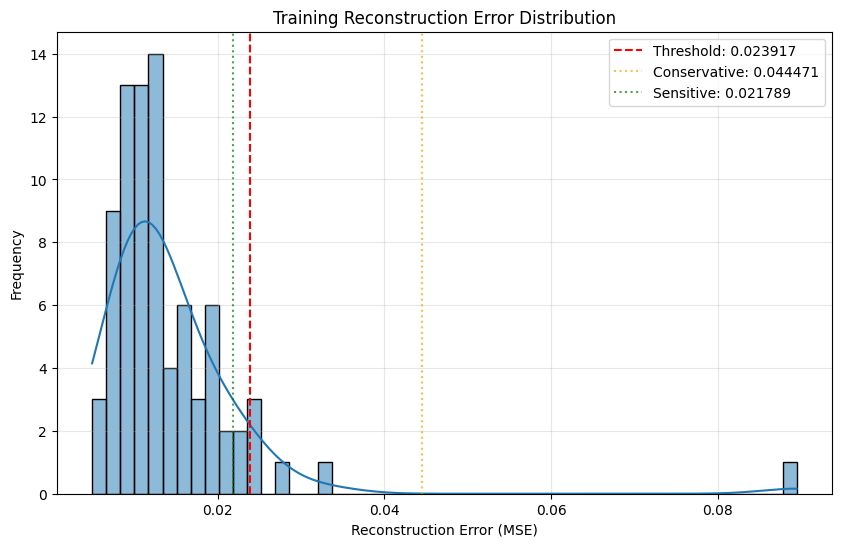

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(train_reconstruction_errors, kde=True, bins=50)
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.6f}')

# Add threshold lines for all sensitivity levels
plt.axvline(x=thresholds['conservative'], color='orange', linestyle=':',
           label=f'Conservative: {thresholds["conservative"]:.6f}', alpha=0.7)
plt.axvline(x=thresholds['sensitive'], color='green', linestyle=':',
           label=f'Sensitive: {thresholds["sensitive"]:.6f}', alpha=0.7)

plt.title('Training Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [30]:
full_pred = best_model.predict(X_scaled, verbose=0)
full_reconstruction_errors = np.mean(np.square(X_scaled - full_pred), axis=1)

In [31]:
# Create a proper copy to avoid SettingWithCopyWarning
df = df.copy()
df['reconstruction_error'] = full_reconstruction_errors
df['is_anomaly'] = df['reconstruction_error'] > threshold

In [32]:
total_anomalies = df['is_anomaly'].sum()
anomaly_percentage = 100 * total_anomalies / len(df)

print(f"Enhanced Anomaly Detection Results:")
print(f"Total anomalies detected: {total_anomalies} out of {len(df)} delivery windows")
print(f"Anomaly percentage: {anomaly_percentage:.2f}%")

Enhanced Anomaly Detection Results:
Total anomalies detected: 18 out of 102 delivery windows
Anomaly percentage: 17.65%


In [33]:
anomaly_data = df[df['is_anomaly'] == True]

if len(anomaly_data) > 0:
    print(f"\nAnomalous Delivery Windows Analysis:")
    print(f"Average total inventory in anomalies: {anomaly_data['total_inventory'].mean():.0f}")
    print(f"Average total inventory overall: {df['total_inventory'].mean():.0f}")

    print(f"\nMost anomalous inventory categories:")
    for item in inventory_features:
        anomaly_avg = anomaly_data[item].mean()
        normal_avg = df[~df['is_anomaly']][item].mean()
        ratio = anomaly_avg / normal_avg if normal_avg > 0 else 0
        print(f"  {item}: {anomaly_avg:.0f} vs {normal_avg:.0f} (ratio: {ratio:.2f})")


Anomalous Delivery Windows Analysis:
Average total inventory in anomalies: 7210
Average total inventory overall: 7510

Most anomalous inventory categories:
  wings: 4790 vs 4943 (ratio: 0.97)
  tenders: 591 vs 715 (ratio: 0.83)
  fries_reg: 137 vs 136 (ratio: 1.01)
  fries_large: 138 vs 155 (ratio: 0.89)
  veggies: 132 vs 148 (ratio: 0.89)
  dips: 463 vs 496 (ratio: 0.93)
  drinks: 216 vs 216 (ratio: 1.00)
  flavours: 741 vs 763 (ratio: 0.97)


In [34]:
seasonal_anomalies = df.groupby('season')['is_anomaly'].agg(['sum', 'count']).reset_index()
seasonal_anomalies['anomaly_rate'] = 100 * seasonal_anomalies['sum'] / seasonal_anomalies['count']

print(f"\nSeasonal Anomaly Patterns:")
for _, row in seasonal_anomalies.iterrows():
    print(f"  {row['season']}: {row['sum']} anomalies out of {row['count']} ({row['anomaly_rate']:.1f}%)")


Seasonal Anomaly Patterns:
  fall: 5 anomalies out of 26 (19.2%)
  spring: 3 anomalies out of 26 (11.5%)
  summer: 3 anomalies out of 27 (11.1%)
  winter: 7 anomalies out of 23 (30.4%)


In [35]:
# Enhanced sample anomalies analysis for inventory data
print("Sample Anomalous Delivery Windows:")
anomalies = df[df['is_anomaly'] == True].sort_values('reconstruction_error', ascending=False)

if len(anomalies) > 0:
    # Display top anomalies with inventory breakdown
    display_cols = ['delivery_date', 'wings', 'tenders', 'total_inventory', 'wings_ratio',
                   'protein_ratio', 'season', 'reconstruction_error']

    print(f"\nTop 10 Most Anomalous Delivery Windows:")
    display(anomalies[display_cols].head(10))

    # Show inventory category analysis
    print(f"\nAnomalous vs Normal Inventory Comparison:")
    normal_data = df[df['is_anomaly'] == False]

    comparison_df = pd.DataFrame({
        'Inventory_Category': inventory_features,
        'Normal_Average': [normal_data[col].mean() for col in inventory_features],
        'Anomaly_Average': [anomalies[col].mean() for col in inventory_features],
    })
    comparison_df['Difference_Ratio'] = comparison_df['Anomaly_Average'] / comparison_df['Normal_Average']

    display(comparison_df.round(1))
else:
    print("No anomalies detected with current threshold settings.")

Sample Anomalous Delivery Windows:

Top 10 Most Anomalous Delivery Windows:


,delivery_date,wings,tenders,total_inventory,wings_ratio,protein_ratio,season,reconstruction_error
104,2024-12-28,1108,117,1720,0.644186,0.712209,winter,0.879709
14,2024-02-17,6743,643,9991,0.674907,0.739265,winter,0.217408
16,2024-02-24,4962,556,7679,0.646178,0.718583,winter,0.153983
105,2024-12-30,1451,112,2071,0.700628,0.754708,winter,0.089437
71,2024-09-02,3888,451,5849,0.664729,0.741836,fall,0.087553
44,2024-06-01,6898,926,10463,0.659276,0.747778,summer,0.079190
37,2024-05-06,4306,341,6119,0.703710,0.759438,spring,0.072500
101,2024-12-16,4511,619,6682,0.675097,0.767734,winter,0.068634
46,2024-06-08,6229,564,8947,0.696211,0.759249,summer,0.064349
8,2024-01-27,3718,754,6290,0.591097,0.710970,winter,0.054450



Anomalous vs Normal Inventory Comparison:


,Inventory_Category,Normal_Average,Anomaly_Average,Difference_Ratio
0,wings,4943.2,4790.2,1.0
1,tenders,715.3,591.4,0.8
2,fries_reg,136.1,137.1,1.0
3,fries_large,155.4,138.5,0.9
4,veggies,148.0,131.8,0.9
5,dips,496.4,463.3,0.9
6,drinks,216.3,216.1,1.0
7,flavours,763.2,741.4,1.0


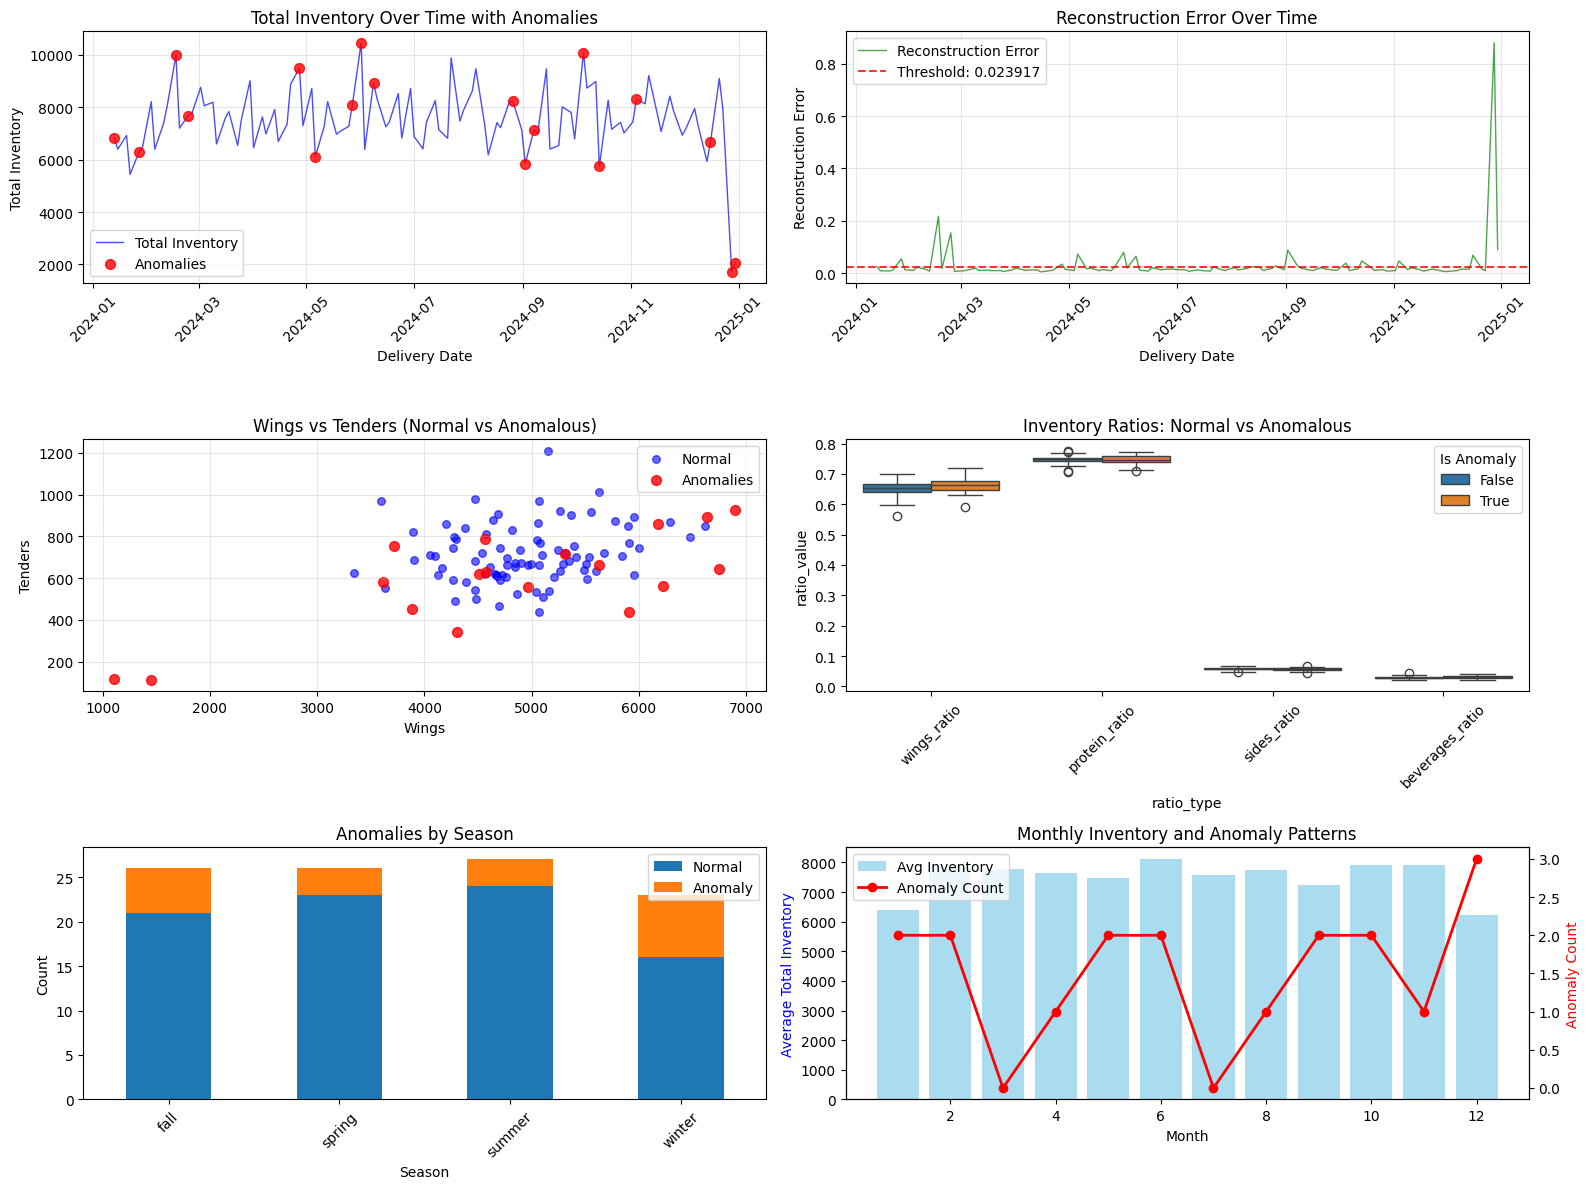

In [36]:
# Enhanced inventory anomaly visualization plots
plt.figure(figsize=(16, 12))

# Sort by delivery date
df_sorted = df.sort_values('delivery_date')

# Plot 1: Total inventory over time with anomalies highlighted
plt.subplot(3, 2, 1)
plt.plot(df_sorted['delivery_date'], df_sorted['total_inventory'],
         label='Total Inventory', alpha=0.7, color='blue', linewidth=1)
anomaly_data = df_sorted[df_sorted['is_anomaly']]
if len(anomaly_data) > 0:
    plt.scatter(anomaly_data['delivery_date'], anomaly_data['total_inventory'],
               color='red', label='Anomalies', s=50, alpha=0.8, zorder=5)
plt.title('Total Inventory Over Time with Anomalies')
plt.xlabel('Delivery Date')
plt.ylabel('Total Inventory')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 2: Reconstruction error over time
plt.subplot(3, 2, 2)
plt.plot(df_sorted['delivery_date'], df_sorted['reconstruction_error'],
         label='Reconstruction Error', alpha=0.7, color='green', linewidth=1)
plt.axhline(y=threshold, color='r', linestyle='--',
           label=f'Threshold: {threshold:.6f}', alpha=0.8)
plt.title('Reconstruction Error Over Time')
plt.xlabel('Delivery Date')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Plot 3: Wings vs Tenders with anomalies
plt.subplot(3, 2, 3)
normal_data = df[~df['is_anomaly']]
if len(normal_data) > 0:
    plt.scatter(normal_data['wings'], normal_data['tenders'],
               alpha=0.6, color='blue', label='Normal', s=30)
if len(anomaly_data) > 0:
    plt.scatter(anomaly_data['wings'], anomaly_data['tenders'],
               alpha=0.8, color='red', label='Anomalies', s=50)
plt.xlabel('Wings')
plt.ylabel('Tenders')
plt.title('Wings vs Tenders (Normal vs Anomalous)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Inventory ratios comparison
plt.subplot(3, 2, 4)
ratio_data = pd.melt(df, id_vars=['is_anomaly'],
                    value_vars=['wings_ratio', 'protein_ratio', 'sides_ratio', 'beverages_ratio'],
                    var_name='ratio_type', value_name='ratio_value')
sns.boxplot(x='ratio_type', y='ratio_value', hue='is_anomaly', data=ratio_data)
plt.title('Inventory Ratios: Normal vs Anomalous')
plt.xticks(rotation=45)
plt.legend(title='Is Anomaly')

# Plot 5: Seasonal anomaly distribution
plt.subplot(3, 2, 5)
seasonal_counts = df.groupby(['season', 'is_anomaly']).size().unstack(fill_value=0)
if len(seasonal_counts.columns) > 1:
    seasonal_counts.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title('Anomalies by Season')
    plt.xlabel('Season')
    plt.ylabel('Count')
    plt.legend(['Normal', 'Anomaly'])
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No anomalies detected', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Anomalies by Season')

# Plot 6: Monthly patterns
plt.subplot(3, 2, 6)
monthly_stats = df.groupby('month').agg({
    'total_inventory': 'mean',
    'is_anomaly': 'sum'
}).reset_index()
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.bar(monthly_stats['month'], monthly_stats['total_inventory'],
        alpha=0.7, color='skyblue', label='Avg Inventory')
ax2.plot(monthly_stats['month'], monthly_stats['is_anomaly'],
         color='red', marker='o', linewidth=2, label='Anomaly Count')

ax1.set_xlabel('Month')
ax1.set_ylabel('Average Total Inventory', color='blue')
ax2.set_ylabel('Anomaly Count', color='red')
plt.title('Monthly Inventory and Anomaly Patterns')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

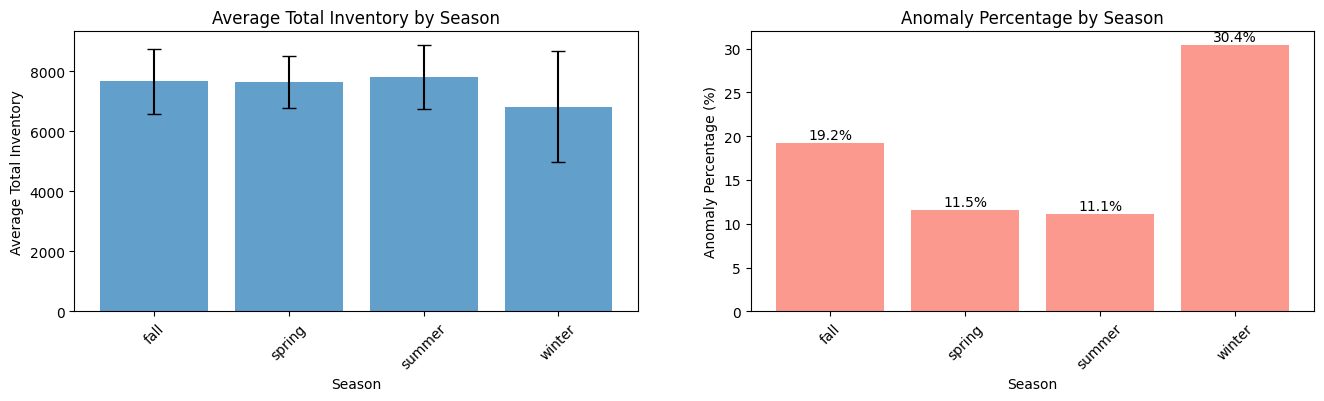

In [37]:
# Enhanced seasonal and temporal analysis
plt.figure(figsize=(16, 8))

# Plot 1: Seasonal inventory patterns with error bars
plt.subplot(2, 2, 1)
seasonal_stats = df.groupby('season').agg({
    'total_inventory': ['mean', 'std', 'count'],
    'is_anomaly': 'sum'
}).round(1)

# Flatten column names
seasonal_stats.columns = ['_'.join(col).strip() for col in seasonal_stats.columns]
seasonal_stats = seasonal_stats.reset_index()

plt.bar(seasonal_stats['season'], seasonal_stats['total_inventory_mean'],
        yerr=seasonal_stats['total_inventory_std'], capsize=5, alpha=0.7)
plt.title('Average Total Inventory by Season')
plt.ylabel('Average Total Inventory')
plt.xlabel('Season')
plt.xticks(rotation=45)

# Plot 2: Anomaly percentage by season
plt.subplot(2, 2, 2)
seasonal_stats['anomaly_percentage'] = 100 * seasonal_stats['is_anomaly_sum'] / seasonal_stats['total_inventory_count']
colors = ['skyblue' if x == 0 else 'salmon' for x in seasonal_stats['is_anomaly_sum']]
bars = plt.bar(seasonal_stats['season'], seasonal_stats['anomaly_percentage'], color=colors, alpha=0.8)
plt.title('Anomaly Percentage by Season')
plt.ylabel('Anomaly Percentage (%)')
plt.xlabel('Season')
plt.xticks(rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}%', ha='center', va='bottom')

In [38]:
# Summary statistics table
print("\n" + "="*60)
print("INVENTORY DELIVERY ANOMALY ANALYSIS SUMMARY")
print("="*60)

print(f"\nDataset Overview:")
print(f"  • Total delivery windows: {len(df)}")
print(f"  • Date range: {df['delivery_date'].min().strftime('%Y-%m-%d')} to {df['delivery_date'].max().strftime('%Y-%m-%d')}")
print(f"  • Average total inventory per delivery: {df['total_inventory'].mean():.0f} items")

if df['is_anomaly'].sum() > 0:
    print(f"\nAnomaly Detection Results:")
    print(f"  • Anomalies detected: {df['is_anomaly'].sum()} out of {len(df)} deliveries ({100*df['is_anomaly'].sum()/len(df):.1f}%)")
    print(f"  • Most anomalous season: {seasonal_stats.loc[seasonal_stats['anomaly_percentage'].idxmax(), 'season']}")
    print(f"  • Average reconstruction error: {df['reconstruction_error'].mean():.6f}")
else:
    print(f"\nAnomaly Detection Results:")
    print(f"  • No anomalies detected with current threshold ({threshold:.6f})")
    print(f"  • Consider using 'sensitive' threshold for more detection")

print(f"\nInventory Patterns:")
print(f"  • Highest inventory category: {df[inventory_features].mean().idxmax()} (avg: {df[inventory_features].mean().max():.0f})")
print(f"  • Most variable category: {df[inventory_features].std().idxmax()} (std: {df[inventory_features].std().max():.0f})")
print(f"  • Average protein ratio: {df['protein_ratio'].mean():.2f}")
print(f"  • Monday vs Saturday deliveries: {df['is_monday'].sum()} vs {df['is_saturday'].sum()}")


INVENTORY DELIVERY ANOMALY ANALYSIS SUMMARY

Dataset Overview:
  • Total delivery windows: 102
  • Date range: 2024-01-13 to 2024-12-30
  • Average total inventory per delivery: 7510 items

Anomaly Detection Results:
  • Anomalies detected: 18 out of 102 deliveries (17.6%)
  • Most anomalous season: winter
  • Average reconstruction error: 0.030758

Inventory Patterns:
  • Highest inventory category: wings (avg: 4916)
  • Most variable category: wings (std: 899)
  • Average protein ratio: 0.75
  • Monday vs Saturday deliveries: 51 vs 51


In [39]:
# Save the trained autoencoder model
best_model.save('inventory_autoencoder_model.h5')
print("✅ Model saved as 'inventory_autoencoder_model.keras'")

✅ Model saved as 'inventory_autoencoder_model.keras'


/Users/callumarul/Library/Mobile Documents/com~apple~CloudDocs/Documents/George Brown Courses/FullStack/Project/food_demand_prediction/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
# Save the scaler for preprocessing new data
import joblib
joblib.dump(scaler, 'inventory_scaler.pkl')
print("✅ Scaler saved as 'inventory_scaler.pkl'")

✅ Scaler saved as 'inventory_scaler.pkl'


In [41]:
joblib.dump(study, 'optuna_study.pkl')

['optuna_study.pkl']

In [42]:
import json
with open('anomaly_threshold.json', 'w') as f:
    json.dump({"balanced": 0.041908}, f)

In [43]:
import pickle
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)